In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import scipy.sparse.linalg
import linear_solvers

In this notebook we analyze the LGMRES method and compare it to the GMRES method for a simple case.

# Setup

In [3]:

# Path to the file
file_path = "Data/add20.mat"

# Load the data
input_data = scipy.io.loadmat(file_path)

# The LHS Matrix
A = input_data['Problem']['A'][0][0].toarray()

# Create the RHS by making it a vector of ones
b = np.ones((A.shape[0], 1))


# GMRES and LGMRES Solver

## GMRES Solve

In [4]:

# Initial guess (make it a vector of zeros)
x0 = np.zeros(b.shape)

# The GMRES solve
(rel_res_convergence_gmres, x_n_gmres, data_dict_gmres) = linear_solvers.GMRES(A, b, x0, 30)


Iter : 0,  Relative Residual Norm : 2.215595e-01
Iter : 25,  Relative Residual Norm : 8.650115e-06


## LGMRES Solve

In [5]:

# Initial guess (make it a vector of zeros)
x0 = np.zeros(b.shape)

# The GMRES solve
(rel_res_convergence_lgmres, x_n_lgmres, data_dict_lgmres) = linear_solvers.LGMRES(A, b, x0, 26, 4)


Iter : 0,  Relative Residual Norm : 2.353211e-01


# Process Results

## Residual Convergence

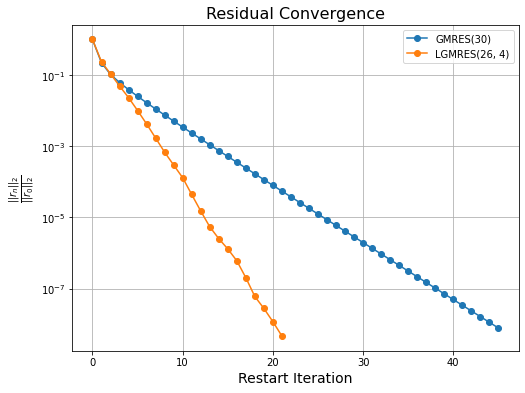

In [6]:

# Plot the convergence history

plt.figure(figsize=(8,6))

plt.semilogy(rel_res_convergence_gmres, marker='o', label="GMRES(30)")
plt.semilogy(rel_res_convergence_lgmres, marker='o', label="LGMRES(26, 4)")

plt.xlabel("Restart Iteration", fontsize=14)
plt.ylabel(r"$\frac{||r_n||_2}{||r_0||_2}$", fontsize=14)

plt.title("Residual Convergence", fontsize=16)

plt.legend()

plt.grid()

#plt.savefig("Results/LGMRES/resid_conv.pdf")


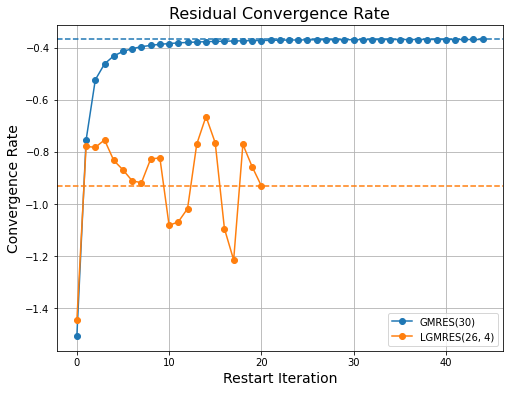

In [9]:

# Plot the convergence rate as a function of restart iteration for each approach.
# That is, we look to see the slope of the error convergence on the semi-log plot.

plt.figure(figsize=(8,6))

# GMRES
rel_res_conv_gmres_np = np.array(rel_res_convergence_gmres)
rel_res_conv_gmres_np_slopes = np.log(rel_res_conv_gmres_np[1:]) - np.log(rel_res_conv_gmres_np[:-1])

plt.plot(rel_res_conv_gmres_np_slopes, marker='o', label="GMRES(%d)" % (30))
plt.axhline(rel_res_conv_gmres_np_slopes[-1], linestyle="--", c="C0")

# LGMRES

rel_res_conv_lgmres_np = np.array(rel_res_convergence_lgmres)
rel_res_conv_lgmres_np_slopes = np.log(rel_res_conv_lgmres_np[1:]) - np.log(rel_res_conv_lgmres_np[:-1])

plt.plot(rel_res_conv_lgmres_np_slopes, marker='o', c="C1", label="LGMRES(%d, %d)" % (30-4, 4))
plt.axhline(rel_res_conv_lgmres_np_slopes[-1], linestyle="--", c="C1")

plt.xlabel("Restart Iteration", fontsize=14)
plt.ylabel("Convergence Rate", fontsize=14)

plt.title("Residual Convergence Rate", fontsize=16)

plt.legend()

plt.grid()

plt.savefig("Results/LGMRES/resid_conv_rate.pdf")


## Angle Analysis
Here, we will now look at the evolution of what are denoted as the sequential and skip angles during convergence.

The sequential angle is the angle between $r_i$ and $r_{i-1}$ whereas the skip angle is that between $r_i$ and $r_{i-2}$.

In [10]:

# ==============================
#       GMRES Processing
# ==============================

res_vecs_rst_conv_gmres = data_dict_gmres['res_vecs_rst_convergence']

# Sequential Angle Values
seq_angles_gmres = []

for i in range(1, len(res_vecs_rst_conv_gmres)):
    
    r_i = res_vecs_rst_conv_gmres[i]
    r_iMin1 = res_vecs_rst_conv_gmres[i-1]
    
    # Compute the cosine of the angle using the dot product
    cos_theta = np.dot(r_i[:,0], r_iMin1[:,0])/(np.linalg.norm(r_i) * np.linalg.norm(r_iMin1))
    
    # Compute the angle between the vectors    
    theta_rad = np.arccos(cos_theta)
    theta_deg = (180./np.pi)*theta_rad
    
    seq_angles_gmres.append(theta_deg)
    
seq_angles_gmres_np = np.array(seq_angles_gmres)


# Skip Angle Values
skip_angles_gmres = []

for i in range(2, len(res_vecs_rst_conv_gmres)):
    
    r_i = res_vecs_rst_conv_gmres[i]
    r_iMin2 = res_vecs_rst_conv_gmres[i-2]
    
    # Compute the cosine of the angle using the dot product
    cos_theta = np.dot(r_i[:,0], r_iMin2[:,0])/(np.linalg.norm(r_i) * np.linalg.norm(r_iMin2))
    
    # Compute the angle between the vectors
    theta_rad = np.arccos(cos_theta)
    theta_deg = (180./np.pi)*theta_rad
    
    skip_angles_gmres.append(theta_deg)

skip_angles_gmres_np = np.array(skip_angles_gmres)



# ==============================
#       LGMRES Processing
# ==============================

res_vecs_rst_conv_lgmres = data_dict_lgmres['res_vecs_rst_convergence']

# Sequential Angle Values
seq_angles_lgmres = []

for i in range(1, len(res_vecs_rst_conv_lgmres)):
    
    r_i = res_vecs_rst_conv_lgmres[i]
    r_iMin1 = res_vecs_rst_conv_lgmres[i-1]
    
    # Compute the cosine of the angle using the dot product
    cos_theta = np.dot(r_i[:,0], r_iMin1[:,0])/(np.linalg.norm(r_i) * np.linalg.norm(r_iMin1))
    
    # Compute the angle between the vectors    
    theta_rad = np.arccos(cos_theta)
    theta_deg = (180./np.pi)*theta_rad
    
    seq_angles_lgmres.append(theta_deg)
    
seq_angles_lgmres_np = np.array(seq_angles_lgmres)


# Skip Angle Values
skip_angles_lgmres = []

for i in range(2, len(res_vecs_rst_conv_lgmres)):
    
    r_i = res_vecs_rst_conv_lgmres[i]
    r_iMin2 = res_vecs_rst_conv_lgmres[i-2]
    
    # Compute the cosine of the angle using the dot product
    cos_theta = np.dot(r_i[:,0], r_iMin2[:,0])/(np.linalg.norm(r_i) * np.linalg.norm(r_iMin2))
    
    # Compute the angle between the vectors
    theta_rad = np.arccos(cos_theta)
    theta_deg = (180./np.pi)*theta_rad
    
    skip_angles_lgmres.append(theta_deg)

skip_angles_lgmres_np = np.array(skip_angles_lgmres)

    

GMRES
Median Seq Angle :  46.346901005858676
Mean Seq Angle :  47.89523397756792
 
LGMRES
Median Seq Angle :  64.87030057057667
Mean Seq Angle :  65.89857725844888


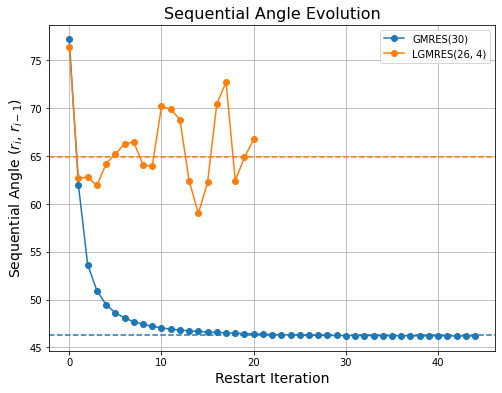

In [29]:

# Analyze the sequential angle data

median_seq_gmres = np.median(seq_angles_gmres_np)
mean_seq_gmres = np.mean(seq_angles_gmres_np)

print("GMRES")
print("Median Seq Angle : ", median_seq_gmres)
print("Mean Seq Angle : ", mean_seq_gmres)

median_seq_lgmres = np.median(seq_angles_lgmres_np)
mean_seq_lgmres = np.mean(seq_angles_lgmres_np)

print(" ")
print("LGMRES")
print("Median Seq Angle : ", median_seq_lgmres)
print("Mean Seq Angle : ", mean_seq_lgmres)

plt.figure(figsize=(8,6))
plt.plot(seq_angles_gmres_np, marker='o', label="GMRES(30)")
plt.plot(seq_angles_lgmres_np, marker='o', label="LGMRES(26, 4)")

plt.axhline(median_seq_gmres, linestyle="--", color='C0')
plt.axhline(median_seq_lgmres, linestyle="--", color='C1')

plt.ylabel(r"Sequential Angle ($r_i$, $r_{i-1}$)", fontsize=14)
plt.xlabel(r"Restart Iteration", fontsize=14)

plt.title("Sequential Angle Evolution", fontsize=16)

plt.grid()
plt.legend()

#plt.savefig("Results/LGMRES/seq_angle_conv.pdf")


GMRES
Median Skip Angle :  1.837587554930423
Mean Skip Angle :  5.140564703778867
 
LGMRES
Median Skip Angle :  80.32329665391916
Mean Skip Angle :  80.18419863550656


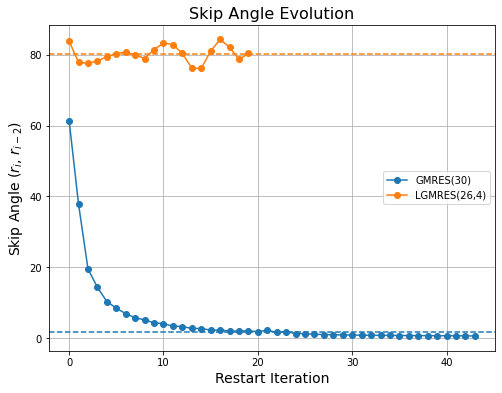

In [30]:

# Analyze the skip angle data

median_skip_gmres = np.median(skip_angles_gmres_np)
mean_skip = np.mean(skip_angles_gmres_np)

print("GMRES")
print("Median Skip Angle : ", median_skip_gmres)
print("Mean Skip Angle : ", mean_skip)

median_skip_lgmres = np.median(skip_angles_lgmres_np)
mean_skip_lgmres = np.mean(skip_angles_lgmres_np)

print(" ")
print("LGMRES")
print("Median Skip Angle : ", median_skip_lgmres)
print("Mean Skip Angle : ", mean_skip_lgmres)

plt.figure(figsize=(8,6))
plt.plot(skip_angles_gmres_np, marker='o', label="GMRES(30)")
plt.plot(skip_angles_lgmres_np, marker='o', label="LGMRES(26,4)")

plt.axhline(median_skip_gmres, linestyle="--", color="C0")
plt.axhline(median_skip_lgmres, linestyle="--", color='C1')

plt.ylabel(r"Skip Angle ($r_i$, $r_{i-2}$)", fontsize=14)
plt.xlabel(r"Restart Iteration", fontsize=14)

plt.title("Skip Angle Evolution", fontsize=16)

plt.grid()
plt.legend()

#plt.savefig("Results/LGMRES/skip_angle_conv.pdf")


So, we see that for this case, the GMRES restart iterations start to produce residuals that at every next iteration are pointing in effectively the same direction. The magnitude of the vector keeps falling (as we see in the residual convergence plot) however we are pretty much always in the same direction every second iteration.